In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [4]:
credit_risk = pd.read_csv('credit_risk_dataset.csv')
credit_risk.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
credit_risk.shape

(32581, 12)

In [6]:
credit_risk.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
credit_risk_copy = credit_risk.copy()

#### <span style='color : green'> Observations :
#### <span style='color : green'> Maximum age is 144 which is not practical at all .We need to investigate the anomaly further to ensure the accuracy and reliability of your data. 
#### <span style='color : green'> Employment length ranges from 0 to 123 years, which seems unusually high and might indicate data entry errors
#### <span style='color : green'> Since people usually retire between ages of 60-65 , we will treat the above noted outliers as errors and remove them 

In [9]:
credit_risk_copy.pivot_table(index='person_age',values = 'loan_amnt',columns = 'loan_status',aggfunc='count').sort_values(by='person_age',ascending=False)

loan_status,0,1
person_age,,
144,3.0,NaN
123,2.0,NaN
94,1.0,NaN
84,1.0,NaN
80,1.0,NaN
78,1.0,NaN
76,1.0,NaN
73,3.0,NaN
70,5.0,2.0


In [10]:
# credit_risk.pivot_table(index='person_age',columns='loan_status',values='person_income',aggfunc='count').reset_index().sort_values(by='person_age',ascending=False)

#### <span style='color : green'> Outlier Removal for Age column:   
#### <span style='color : green'> We are removing customers whose age > 70 years since it's observed that number of customers who defaulted is null.

In [12]:
cr_age_rmvd = credit_risk[credit_risk['person_age']<=70]
cr_age_rmvd.reset_index(drop=True, inplace=True)
cr_age_rmvd.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [13]:
cr_age_rmvd.shape

(32568, 12)

In [15]:
cr_age_rmvd.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


#### <span style='color : green'> Outlier Removal for Employment Length column:   
#### <span style='color : green'> Remove customers whose employment length is greater than 47 years, assuming the minimum and maximum age for employment is 18 to 65 years.


#### <span style='color : green'>  We'll use pivot table for preliminary analysis

In [26]:
cr_age_rmvd.pivot_table(index='person_emp_length',columns='loan_status',values='person_income',aggfunc='count').reset_index().sort_values(by='person_emp_length',ascending=False)

loan_status,person_emp_length,0,1
34,123.0,1.0,1.0
33,38.0,1.0,NaN
32,34.0,NaN,1.0
31,31.0,4.0,NaN
30,30.0,1.0,1.0
29,29.0,NaN,1.0
28,28.0,3.0,NaN
27,27.0,4.0,1.0
26,26.0,5.0,1.0
25,25.0,8.0,NaN


In [28]:
person_emp_rmvd = cr_age_rmvd[cr_age_rmvd['person_emp_length']<=47]
person_emp_rmvd.reset_index(drop=True, inplace=True)
person_emp_rmvd.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [30]:
person_emp_rmvd.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31671.000000,3.167100e+04,31671.000000,31671.000000,28626.000000,31671.000000,31671.000000,31671.000000
mean,27.717754,6.649231e+04,4.780714,9660.637492,11.040070,0.215497,0.169621,5.804395
std,6.159859,5.277413e+04,4.028718,6334.716643,3.229507,0.411173,0.106275,4.048776
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.936600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,70.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### <span style='color : red'> Check for missing values 

In [33]:
person_emp_rmvd.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3045
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

#### <span style='color : green'> 3045 missing values only in the loan_int_rate column 
#### <span style='color : green'> After taking a look at the descriptive statistics , mean is close to the median which indicates that the data distribution is approximately symmetric and not heavily skewed and we can replace the missing values with either.




<Axes: xlabel='loan_int_rate', ylabel='Count'>

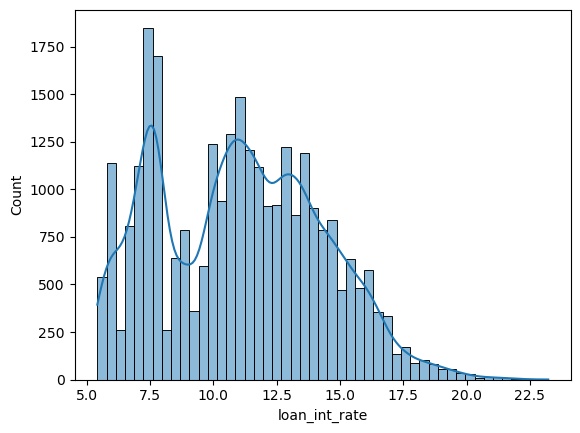

In [36]:
sns.histplot(data=person_emp_rmvd, x='loan_int_rate',kde=True, fill=True)

In [37]:
cr_data = person_emp_rmvd.copy()

### <span style='color : green'> Median Imputation

In [41]:
cr_data.fillna({'loan_int_rate':cr_data['loan_int_rate'].median()},inplace=True)

In [43]:
cr_data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### <span style='color : green'>  Observation : The data is imbalanced

In [46]:
cr_data.groupby('loan_status').count()['person_income']

loan_status
0    24846
1     6825
Name: person_income, dtype: int64

In [48]:
6825/(6825+24846)

0.21549682675002368

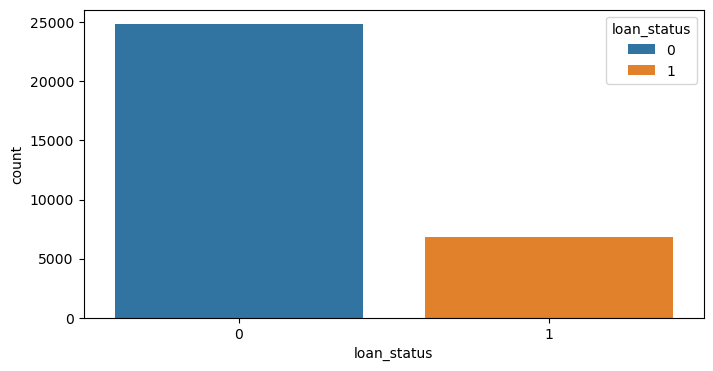

In [50]:
plt.figure(figsize=(8,4))
sns.countplot(x='loan_status',data=cr_data,hue='loan_status')
plt.show()

In [52]:
variables = ['person_age','person_income','person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status']
credit_risk_corr = cr_data[variables].corr()
credit_risk_corr

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
person_age,1.000000,0.143187,0.171726,0.053537,0.010736,-0.039962,0.878587,-0.021227
person_income,0.143187,1.000000,0.155069,0.314637,-0.003515,-0.293464,0.124837,-0.164160
person_emp_length,0.171726,0.155069,1.000000,0.111314,-0.055070,-0.058443,0.148438,-0.085937
loan_amnt,0.053537,0.314637,0.111314,1.000000,0.138542,0.576991,0.043291,0.112144
loan_int_rate,0.010736,-0.003515,-0.055070,0.138542,1.000000,0.117371,0.015029,0.323226
loan_percent_income,-0.039962,-0.293464,-0.058443,0.576991,0.117371,1.000000,-0.030346,0.379811
cb_person_cred_hist_length,0.878587,0.124837,0.148438,0.043291,0.015029,-0.030346,1.000000,-0.016255
loan_status,-0.021227,-0.164160,-0.085937,0.112144,0.323226,0.379811,-0.016255,1.000000


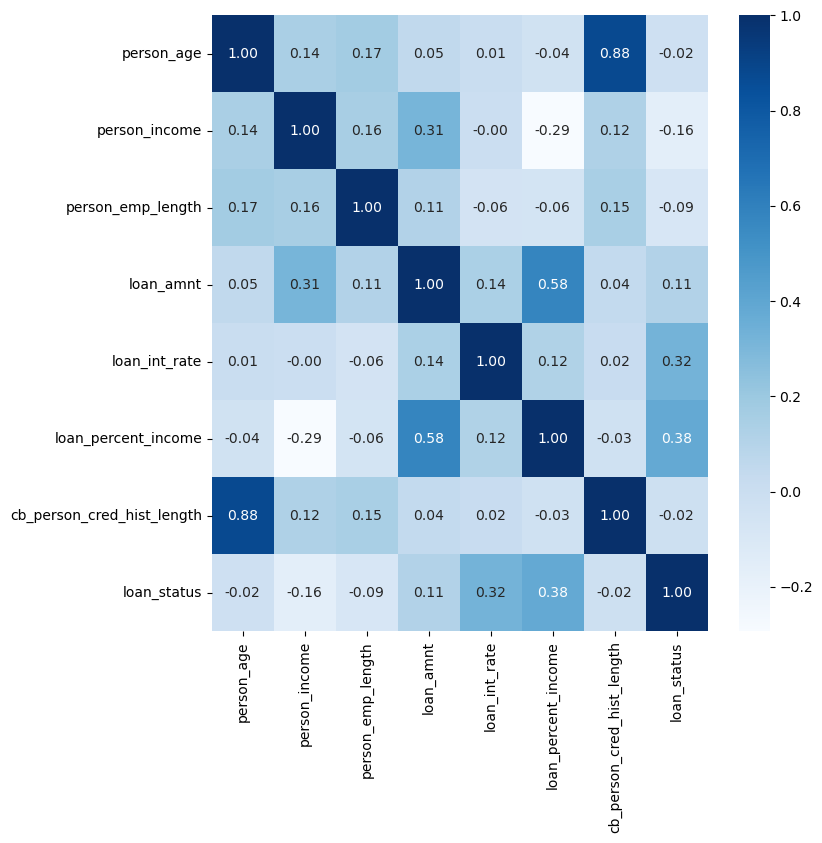

In [54]:
plt.figure(figsize=(8,8))
sns.heatmap(credit_risk_corr, cmap='Blues', annot=True, fmt='.2f')
plt.show()

### <span style = 'color:green'> Observation: Variables with most correlation </span>

### <span style = 'color:green'> cb_person_cred_hist_length x person_age , 
### <span style = 'color:green'>loan_percent_income x loan_amount , 
### <span style = 'color:green'>person_income x loan_amount </span>


In [58]:
cr_data.groupby('person_home_ownership').count()['loan_intent']

person_home_ownership
MORTGAGE    13088
OTHER         107
OWN          2410
RENT        16066
Name: loan_intent, dtype: int64

In [68]:
var_categorical = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for i in var_categorical:
    print(f'Total row of variable {i}')
    print(cr_data.value_counts())
    print()

Total row of variable person_home_ownership
person_age  person_income  person_home_ownership  person_emp_length  loan_intent        loan_grade  loan_amnt  loan_int_rate  loan_status  loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length
34          38769          MORTGAGE               3.0                DEBTCONSOLIDATION  A           2400       8.90           0            0.06                 N                          6                             2
33          87000          MORTGAGE               17.0               VENTURE            E           9000       17.93          0            0.10                 Y                          7                             2
22          24449          OWN                    2.0                VENTURE            B           1800       11.89          0            0.07                 N                          4                             2
26          50004          MORTGAGE               10.0               PERSONAL        

In [62]:
cr_data.groupby('loan_intent').count()['person_home_ownership']

loan_intent
DEBTCONSOLIDATION    5064
EDUCATION            6288
HOMEIMPROVEMENT      3510
MEDICAL              5891
PERSONAL             5365
VENTURE              5553
Name: person_home_ownership, dtype: int64

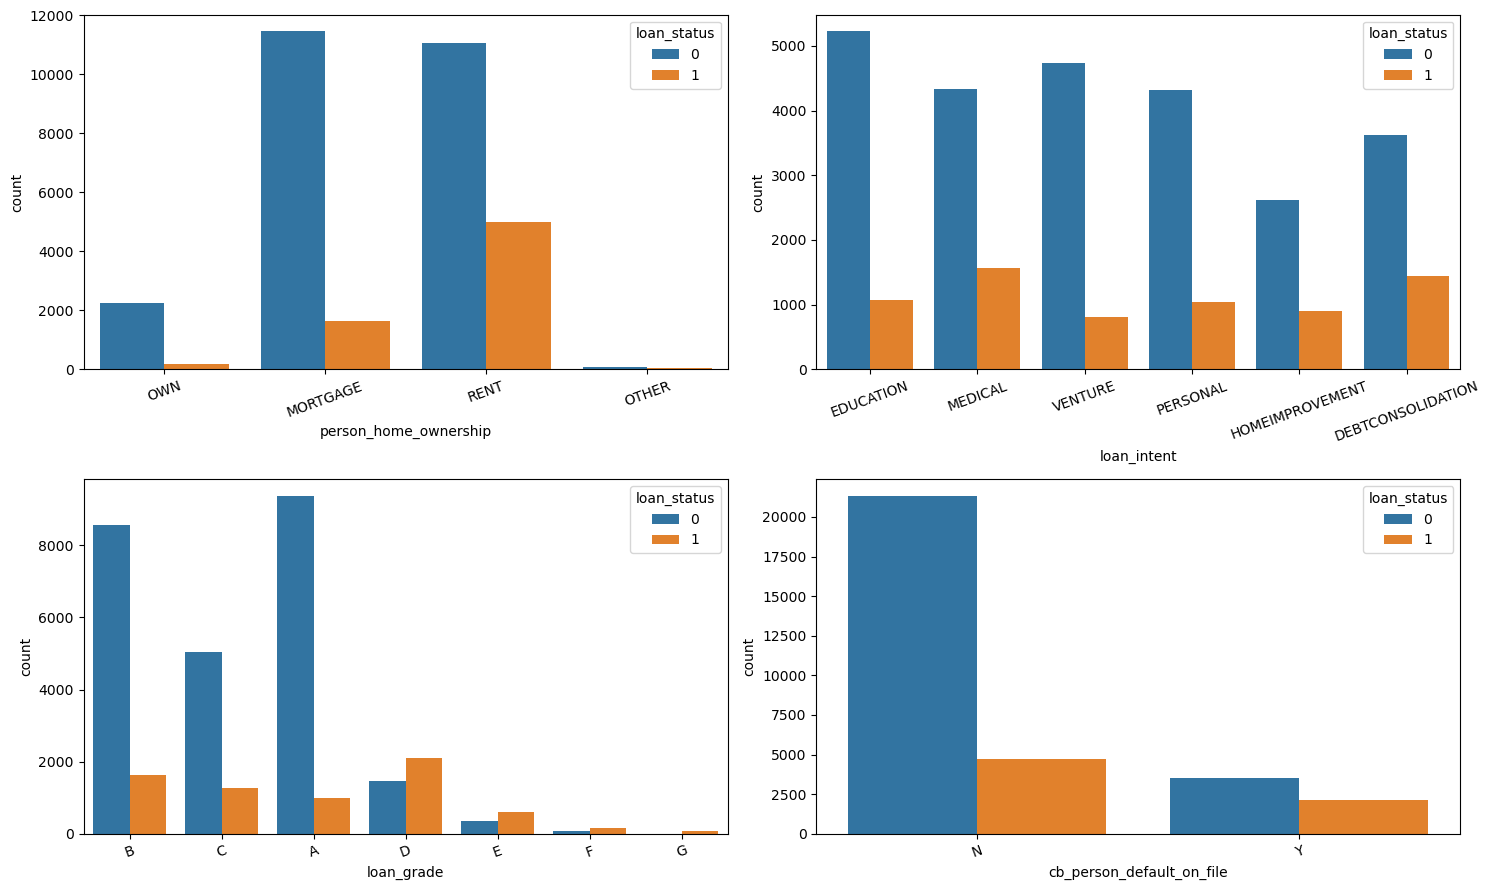

In [78]:
#Analysing categorical variables with target
plt.figure(figsize=(15,9))
for i in range(0,len(var_categorical)):
    plt.subplot(2,2,i + 1)
    sns.countplot(data= cr_data, x = var_categorical[i], hue='loan_status')
    plt.tight_layout()
    plt.xticks(rotation=20)

In [80]:
cr_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


## Categorical Features Treatment

### <span style = 'color:blue'> Most machine learning algorithms, including Logistic Regression, XGBoost, and neural networks, require numerical input. They cannot process categorical data directly </span>
### <span style = 'color:blue'> Properly encoded categorical features can improve the model’s accuracy by allowing it to capture the relationships between categories and the target variabe . Since we do not have ordinal features we'll be using one hot encoding (binary feature treated independently) </span>

In [110]:
cr_data_cat_treated = cr_data.copy()

In [114]:
person_home_ownership = pd.get_dummies(cr_data_cat_treated['person_home_ownership'],drop_first=True).astype(int)
#drop first 
loan_intent = pd.get_dummies(cr_data_cat_treated['loan_intent'],drop_first=True).astype(int)
loan_grade = pd.get_dummies(cr_data_cat_treated['loan_grade'],drop_first=True).astype(int)
cr_data_cat_treated['cb_person_default_on_file_binary'] = np.where(cr_data_cat_treated['cb_person_default_on_file']=='Y',1,0)
cr_data_cat_treated.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,cb_person_default_on_file_binary
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,1
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0


In [215]:
loan_intent.head()

,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1


### <span style = 'color:blue'> To ensure that no single feature dominates the model due to its scale we will do standardization . Say age = 21 and person_income have own significance and the model should not be 

### <span style = 'color:blue'> We'll drop those columns we don't need to scale </span>

In [121]:
data_to_scale = cr_data_cat_treated.drop(['person_home_ownership','loan_intent','loan_grade','loan_status','cb_person_default_on_file','cb_person_default_on_file_binary'],axis=1)

In [123]:
data_to_scale.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,21,9600,5.0,1000,11.14,0.10,2
1,25,9600,1.0,5500,12.87,0.57,3
2,23,65500,4.0,35000,15.23,0.53,2
3,24,54400,8.0,35000,14.27,0.55,4
4,21,9900,2.0,2500,7.14,0.25,2


In [125]:
scaler = StandardScaler()

In [127]:
data_to_scale.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

In [129]:
scaled_data = scaler.fit_transform(data_to_scale)
# scaled_data is array so convert to df
scaled_df = pd.DataFrame(scaled_data,columns=['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'])
scaled_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,-1.090587,-1.078051,0.054432,-1.367192,0.034115,-0.655113,-0.939656
1,-0.441211,-1.078051,-0.938456,-0.656810,0.597575,3.767461,-0.692664
2,-0.765899,-0.018803,-0.193790,4.000141,1.366226,3.391072,-0.939656
3,-0.603555,-0.229137,0.799097,4.000141,1.053554,3.579267,-0.445671
4,-1.090587,-1.072366,-0.690234,-1.130398,-1.268682,0.756347,-0.939656


In [32]:
scaled_df.shape

(31671, 7)

In [135]:
#validation 
round(np.std(scaled_df.person_income),2)

1.0

In [137]:
scaled_df.shape

(31671, 7)

In [139]:
scaled_data_combined = pd.concat([scaled_df,person_home_ownership,loan_intent,loan_grade],axis=1)
scaled_data_combined['cb_person_default_on_file'] = cr_data_cat_treated['cb_person_default_on_file_binary']
scaled_data_combined['loan_status'] = cr_data_cat_treated['loan_status']
scaled_data_combined.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,RENT,...,PERSONAL,VENTURE,B,C,D,E,F,G,cb_person_default_on_file,loan_status
0,-1.090587,-1.078051,0.054432,-1.367192,0.034115,-0.655113,-0.939656,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,-0.441211,-1.078051,-0.938456,-0.656810,0.597575,3.767461,-0.692664,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,-0.765899,-0.018803,-0.193790,4.000141,1.366226,3.391072,-0.939656,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,-0.603555,-0.229137,0.799097,4.000141,1.053554,3.579267,-0.445671,0,0,1,...,0,0,0,1,0,0,0,0,1,1
4,-1.090587,-1.072366,-0.690234,-1.130398,-1.268682,0.756347,-0.939656,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [141]:
scaled_data_combined.shape

(31671, 23)

In [34]:
scaled_data_combined.groupby('loan_status').count()['EDUCATION']

loan_status
0    24846
1     6825
Name: EDUCATION, dtype: int64

In [143]:
target = scaled_data_combined['loan_status']
features = scaled_data_combined.drop('loan_status',axis=1)
features.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,RENT,...,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G,cb_person_default_on_file
0,-1.090587,-1.078051,0.054432,-1.367192,0.034115,-0.655113,-0.939656,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,-0.441211,-1.078051,-0.938456,-0.656810,0.597575,3.767461,-0.692664,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,-0.765899,-0.018803,-0.193790,4.000141,1.366226,3.391072,-0.939656,0,0,1,...,1,0,0,0,1,0,0,0,0,0
3,-0.603555,-0.229137,0.799097,4.000141,1.053554,3.579267,-0.445671,0,0,1,...,1,0,0,0,1,0,0,0,0,1
4,-1.090587,-1.072366,-0.690234,-1.130398,-1.268682,0.756347,-0.939656,0,1,0,...,0,0,1,0,0,0,0,0,0,0


## Data Balancing

In [146]:
from imblearn.over_sampling import SMOTE

In [148]:
smote = SMOTE()

In [150]:
balanced_features, balanced_target = smote.fit_resample(features,target)

In [156]:
balanced_target.shape

(49692,)

In [154]:
balanced_target_df = pd.DataFrame({'target':balanced_target})
balanced_target_df.groupby('target').size()

target
0    24846
1    24846
dtype: int64

## Models Training

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

In [168]:
x_train, x_test, y_train, y_test = train_test_split(balanced_features, balanced_target,test_size=0.20,random_state=42)

In [174]:
logit = LogisticRegression()

In [176]:
logit.fit(x_train,y_train)

LogisticRegression()

In [85]:
import pickle

In [87]:
with open('logisticPDmodel.pkl','wb') as file:
    pickle.dump(logit,file)

In [178]:
logit.score(x_train,y_train)

0.7970719191004453

In [180]:
logit_prediction = logit.predict(x_test)

In [182]:
print(classification_report(y_test,logit_prediction))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      4995
           1       0.81      0.78      0.80      4944

    accuracy                           0.80      9939
   macro avg       0.80      0.80      0.80      9939
weighted avg       0.80      0.80      0.80      9939



In [184]:
print(logit.coef_[0])

[-0.09089814  0.07569723 -0.01430159 -0.74220809  0.78169471  1.45667208
  0.03908962 -0.91183121 -2.27682439  0.45382405 -1.25605914 -0.4024213
 -0.59808498 -1.05116559 -1.59592325 -0.48801846 -0.58807831  1.07037141
  0.87134911  0.79138284  2.09663438 -0.08373887]


### We can find important features for logistic regression using logit.coef_

In [187]:
features_imp_logit = pd.DataFrame({'features':balanced_features.columns,'logit_imp':logit.coef_[0]})

In [189]:
features_imp_logit

,features,logit_imp
0,person_age,-0.090898
1,person_income,0.075697
2,person_emp_length,-0.014302
3,loan_amnt,-0.742208
4,loan_int_rate,0.781695
5,loan_percent_income,1.456672
6,cb_person_cred_hist_length,0.039090
7,OTHER,-0.911831
8,OWN,-2.276824
9,RENT,0.453824


### Surprisingly features like cb_person_cred_hist_length , person_emp_length , person_income , person_age and cb_person_default_on_file are not important features 

## RandomForest

In [193]:
rf = RandomForestClassifier()

In [195]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [88]:
with open('RandomForesPDmodel.pkl','wb') as file:
    pickle.dump(rf,file)

In [199]:
rf.score(x_train,y_train)

1.0

In [201]:
rf_prediction = rf.predict(x_test)
rf_prediction

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [203]:
print(classification_report(y_test,rf_prediction))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4995
           1       0.98      0.91      0.94      4944

    accuracy                           0.95      9939
   macro avg       0.95      0.95      0.95      9939
weighted avg       0.95      0.95      0.95      9939



In [205]:
rf.feature_importances_

array([0.05871424, 0.13887785, 0.06982012, 0.07914005, 0.14528413,
       0.19918122, 0.06003066, 0.00041913, 0.02034093, 0.04534992,
       0.01501794, 0.01562482, 0.00865516, 0.01334963, 0.01769633,
       0.00768618, 0.01648553, 0.05740348, 0.01328665, 0.00332996,
       0.00133366, 0.01297241])

In [211]:
features_imp_rf = pd.DataFrame({'features':balanced_features.columns,'rf_imp':rf.feature_importances_})
features_imp_rf.sort_values(by='rf_imp',ascending=False)

,features,rf_imp
5,loan_percent_income,0.199181
4,loan_int_rate,0.145284
1,person_income,0.138878
3,loan_amnt,0.079140
2,person_emp_length,0.069820
6,cb_person_cred_hist_length,0.060031
0,person_age,0.058714
17,D,0.057403
9,RENT,0.045350
8,OWN,0.020341


In [213]:
features_imp = pd.concat([features_imp_logit,features_imp_rf],axis=1)
features_imp

,features,logit_imp,features,rf_imp
0,person_age,-0.090898,person_age,0.058714
1,person_income,0.075697,person_income,0.138878
2,person_emp_length,-0.014302,person_emp_length,0.069820
3,loan_amnt,-0.742208,loan_amnt,0.079140
4,loan_int_rate,0.781695,loan_int_rate,0.145284
5,loan_percent_income,1.456672,loan_percent_income,0.199181
6,cb_person_cred_hist_length,0.039090,cb_person_cred_hist_length,0.060031
7,OTHER,-0.911831,OTHER,0.000419
8,OWN,-2.276824,OWN,0.020341
9,RENT,0.453824,RENT,0.045350
